# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [3]:
%%R

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.1.4      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Read data

In [4]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip popul…¹ borough pct_h…² pct_a…³ pct_a…⁴ pct_b…⁵ pct_w…⁶ pct_n…⁷ pct_s…⁸
   <dbl>   <dbl> <chr>     <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 11368  112088 QUEENS    76.5    11.6     0.09    7.12    3.73    0       0.37
 2 11385  107796 QUEENS    45.0     6.46    0.03    1.77   45.3     0       0.32
 3 11211  103123 BROOKL…   24.1     5.53    0.19    3.56   64.2     0.02    0.29
 4 11208  101313 BROOKL…   40.6     6.01    0.03   48.9     2.71    0       0.76
 5 10467  101255 BRONX     52.1     5.68    0.35   30.4     9.24    0.02    0.76
 6 11236  100844 BROOKL…    7.66    2.58 

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


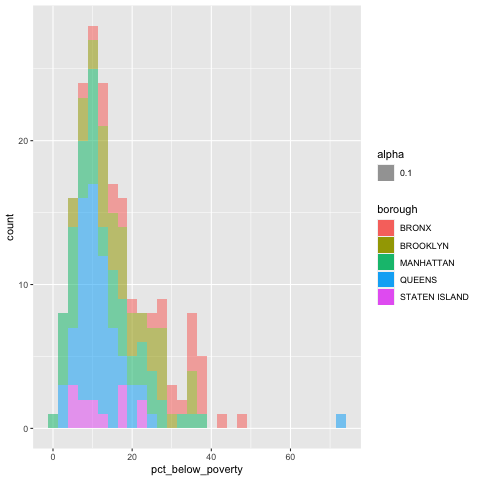

In [5]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty, fill=borough, alpha=.1) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


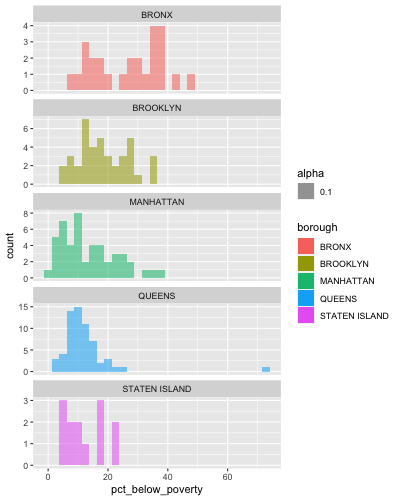

In [6]:
%%R -w 400 -h 500

ggplot(df) + 
    aes(x=pct_below_poverty, fill=borough, alpha=.1) +
    geom_histogram() +
    facet_wrap(~borough, ncol=1, scales='free_y')

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

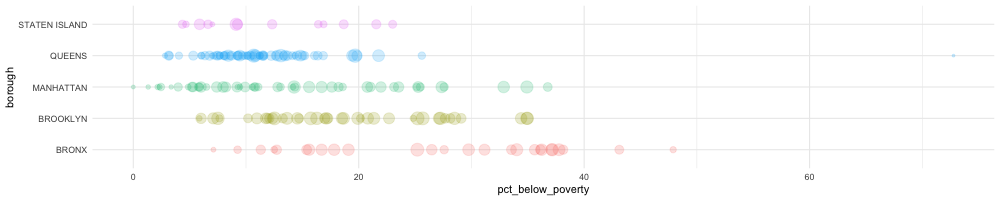

In [7]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, color=borough) +
    geom_point(alpha=.2) +
    theme_minimal() +
    theme(
        legend.position="none"
    )

In [10]:
# %%R
# # choroplethr_acs(tableId="B19301", lod="zip")
# library(choroplethr)
# # data(df_pop_county)
# # county_choropleth(df_pop_county)
# zip_map(df,
#         title   = "2012 Population Estimates",
#         legend  = "Population",
#         buckets = 1,
#         zoom    = c("california", "washington", "oregon"))


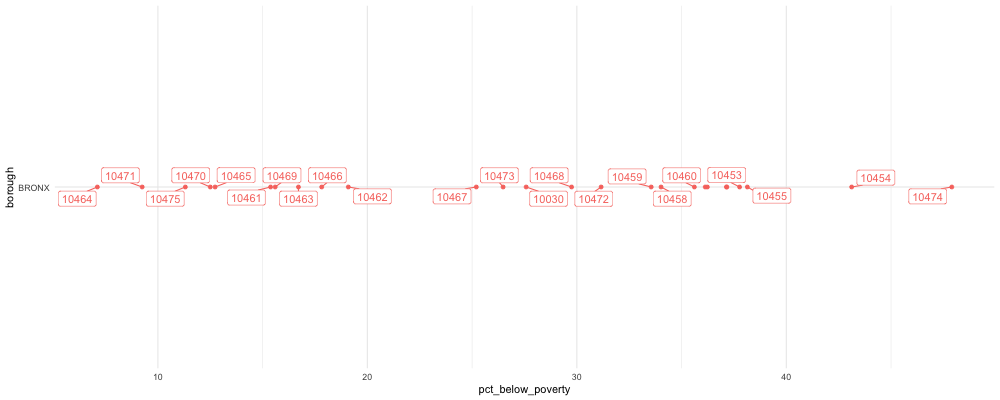

In [11]:
%%R -w 1000 -h 400

library(ggrepel)

ggplot(df %>% filter(borough=="BRONX")) + 
    aes(x=pct_below_poverty, y=borough, color=borough) +
    geom_label_repel(aes(label=zip),min.segment.length = 0)+
    geom_point() +
    theme_minimal() +
    theme(
        legend.position="none"
    )

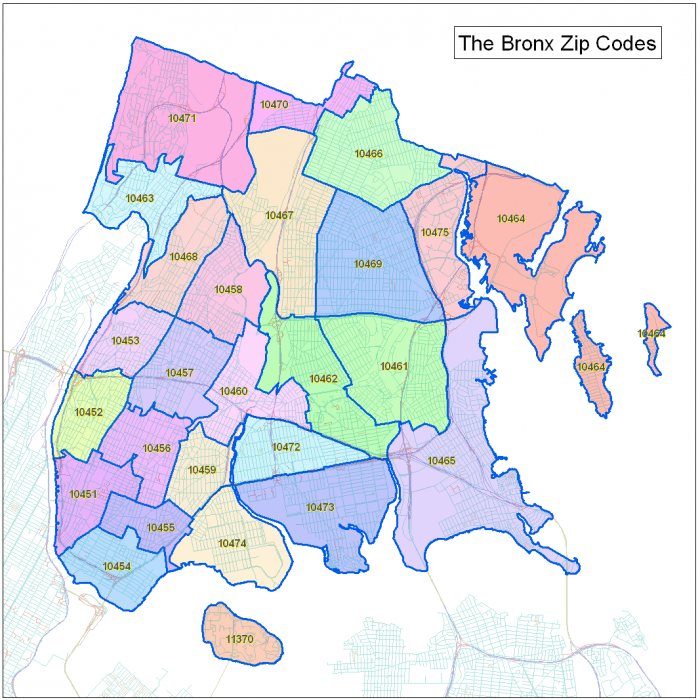

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

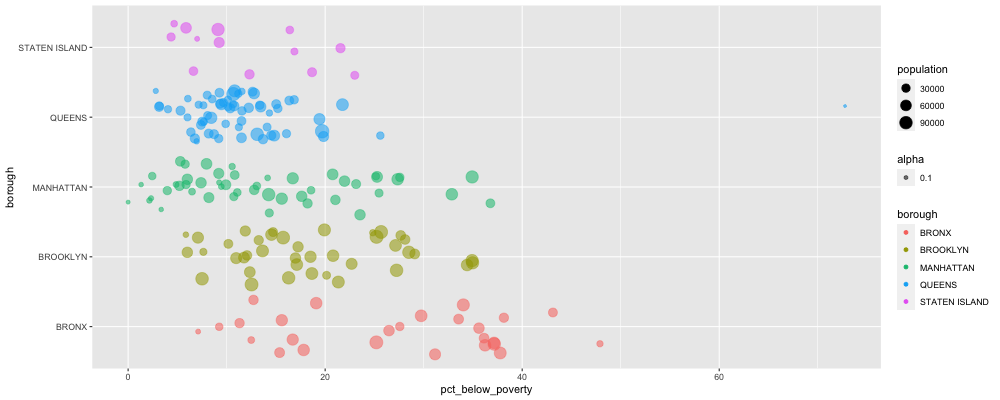

In [16]:
%%R -w 1000 -h 400

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, color=borough, size=population, alpha=.1) +
    geom_jitter() 

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


In [ ]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty, fill=borough) +
    geom_density(adjust=1/2) +
    facet_wrap(~borough, nrow=1)

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


In [ ]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, group=borough, color=borough) +
    geom_boxplot(alpha=.2,outlier.size=10) + 
    theme_minimal()

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> write your answer here



In [ ]:
%%R -w 500 -h 400

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_violin()

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

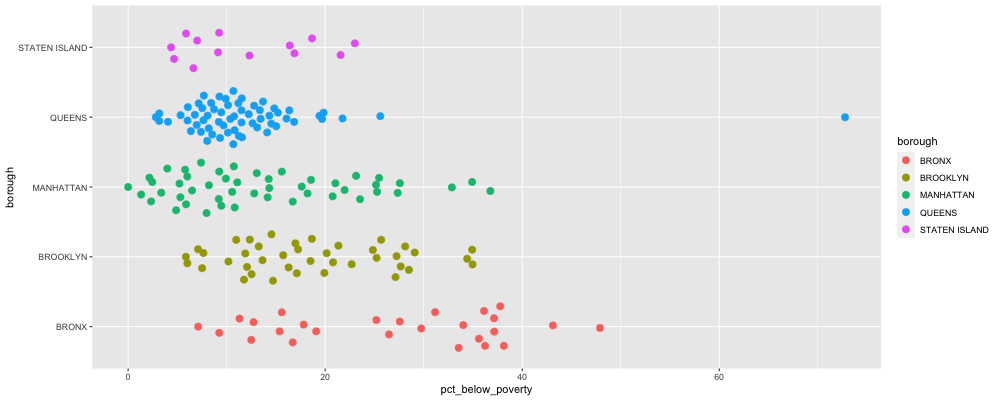

In [17]:
%%R -w 1000 -h 400

library(ggbeeswarm)

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, color=borough, group=borough) +
    geom_quasirandom(size=3) 
    

In [18]:
%%R 

df %>% 
    group_by(borough) %>%
    summarize(
        mean=mean(pct_below_poverty), 
        median=median(pct_below_poverty), 
        standard_deviation=sd(pct_below_poverty))

# A tibble: 5 × 4
  borough        mean median standard_deviation
  <chr>         <dbl>  <dbl>              <dbl>
1 BRONX          26.7  28.7               11.6 
2 BROOKLYN       18.6  17.2                8.20
3 MANHATTAN      13.8  11.0                9.41
4 QUEENS         12.0  10.7                9.06
5 STATEN ISLAND  12.0   9.24               6.58
